In [4]:
import pandas as pd
from pathlib import Path
import numpy as np

In [5]:
dataset = Path("/content/machine_temp_failure_missing.csv")
#Path to dataset

In [6]:
df = pd.read_csv(dataset)
#dataset to pandas dataframe

In [21]:
#Inspection
print("A quick look at the dataset:")
print(df.head())
print("\n")
print(df.info())


A quick look at the dataset:
          timestamp  temperature  delta_temperature
0  02-12-2013 21:15    73.967322                NaN
1  02-12-2013 21:20    74.935882           0.968560
2  02-12-2013 21:25    76.124162           1.188280
3  02-12-2013 21:30    78.140707           2.016546
4  02-12-2013 21:35    79.329836           1.189128


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22695 entries, 0 to 22694
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          22695 non-null  object 
 1   temperature        21410 non-null  float64
 2   delta_temperature  21380 non-null  float64
dtypes: float64(2), object(1)
memory usage: 532.0+ KB
None


In [8]:
#Missing values of the dataset
print("\nMissing Values of the dataset:")
print(df.isnull().sum())


Missing Values of the dataset:
timestamp       0
value        1285
dtype: int64


In [9]:
#Statistics

statistics = df.describe()

mean = statistics.loc["mean", :]
maximum = statistics.loc["max", :]
minimum = statistics.loc["min", :]

print("Statistics of the dataset:\n", statistics)
print("\n")

print("Mean of the dataset:\n", mean)
print("\n")
print("Maximum of the dataset:\n", maximum)
print("\n")
print("Minimum of the dataset:\n", minimum)

Statistics of the dataset:
               value
count  21410.000000
mean      85.968188
std       13.553070
min        2.084721
25%       83.082867
50%       89.251290
75%       93.910748
max      108.510543


Mean of the dataset:
 value    85.968188
Name: mean, dtype: float64


Maximum of the dataset:
 value    108.510543
Name: max, dtype: float64


Minimum of the dataset:
 value    2.084721
Name: min, dtype: float64


In [10]:
#Renaming the value column to temperature
df.rename(columns={"value" : "temperature"}, inplace=True)
print(df.head())

          timestamp  temperature
0  02-12-2013 21:15    73.967322
1  02-12-2013 21:20    74.935882
2  02-12-2013 21:25    76.124162
3  02-12-2013 21:30    78.140707
4  02-12-2013 21:35    79.329836


In [22]:
#Calculating delta temperature
df["delta_temperature"] = df["temperature"].diff()

# Removing the first row since the difference for the first value is Nan
df = df.iloc[1:]

In [23]:
#Updating csv file
df.to_csv("/content/machine_temp_failure_missing_with_delta_temp.csv ", index = False)
print(df.head())

          timestamp  temperature  delta_temperature
1  02-12-2013 21:20    74.935882           0.968560
2  02-12-2013 21:25    76.124162           1.188280
3  02-12-2013 21:30    78.140707           2.016546
4  02-12-2013 21:35    79.329836           1.189128
5  02-12-2013 21:40    78.710418          -0.619417


In [24]:
import numpy as np
import matplotlib.pyplot as plt

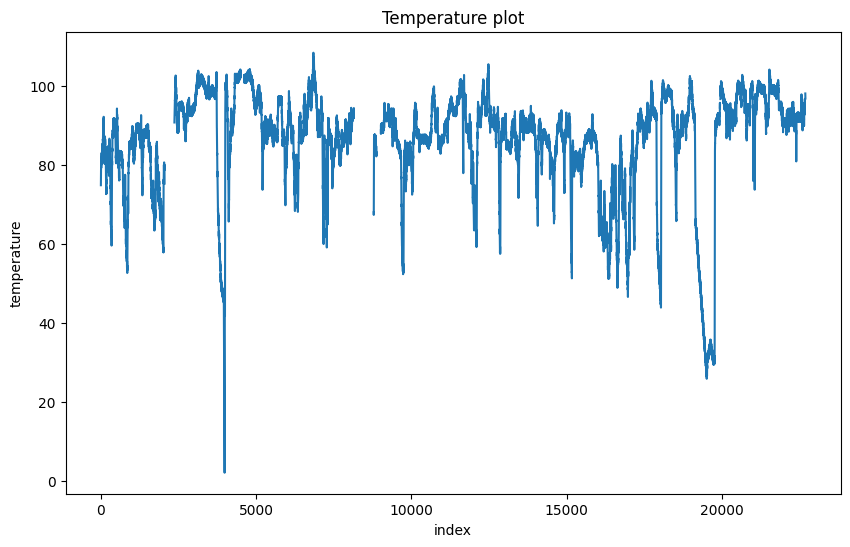

In [27]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df['temperature'])
plt.ylabel('temperature')
plt.xlabel('index')
plt.title('Temperature plot')
plt.show()


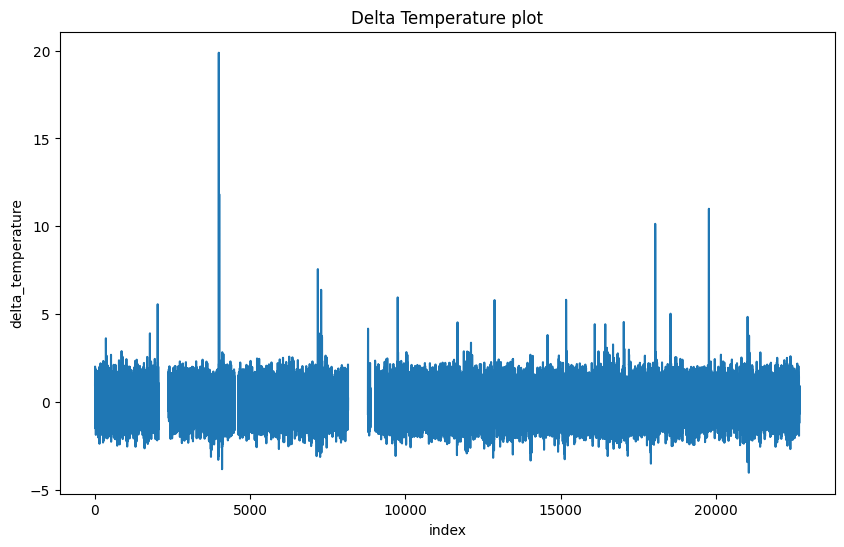

In [28]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df['delta_temperature'])
plt.ylabel('delta_temperature')
plt.xlabel('index')
plt.title('Delta Temperature plot')
plt.show()

In [29]:
!pip install hvplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
import pandas as pd
import hvplot.pandas 


In [31]:
df

,timestamp,temperature,delta_temperature
1,02-12-2013 21:20,74.935882,0.968560
2,02-12-2013 21:25,76.124162,1.188280
3,02-12-2013 21:30,78.140707,2.016546
4,02-12-2013 21:35,79.329836,1.189128
5,02-12-2013 21:40,78.710418,-0.619417
...,...,...,...
22690,19-02-2014 15:05,98.185415,NaN
22691,19-02-2014 15:10,97.804168,-0.381246
22692,19-02-2014 15:15,97.135468,-0.668700
22693,19-02-2014 15:20,98.056852,0.921384


In [50]:
# Temperature plot using hvPlot
x=df.hvplot.line(x='index', y='temperature', xlabel='Index', ylabel='Temperature', title='Temperature Plot', width=600, height=400)

# Delta_temperature plot using hvPlot
y=df.hvplot.line(x='index', y='delta_temperature', xlabel='Index', ylabel='Delta Temperature', title='Delta Temperature Plot', width=600, height=400)

x+y


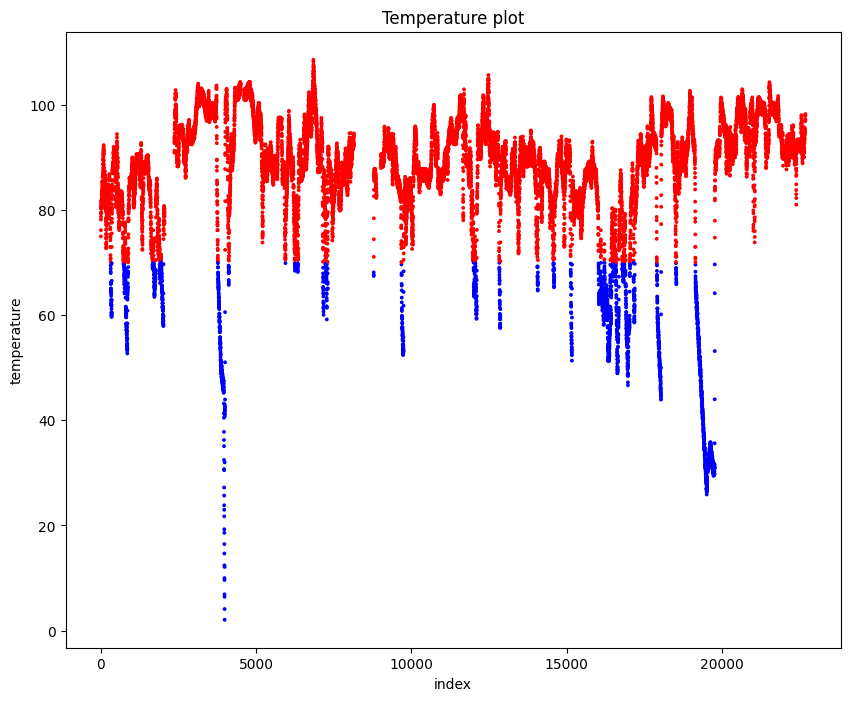

In [49]:
plt.figure(figsize=(10,8))
color = ['red' if temperature>70.00 else 'blue' for temperature in df['temperature']]

plt.scatter(df.index, df['temperature'], c=color, s=3)
plt.xlabel('index')
plt.ylabel('temperature')
plt.title('Temperature plot')
plt.show()

In [63]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

y_true = df['value']

# Imputation using Scikit-Learn (SimpleImputer) with interpolation
df_interpolate = df.copy()
imputer = SimpleImputer(strategy='constant', fill_value=None)
df_interpolate['value'] = imputer.fit_transform(df_interpolate[['value']])
y_pred_interpolate = df_interpolate['value']

# Calculate the RMSE score for interpolation
rmse_interpolate = mean_squared_error(y_true, y_pred_interpolate, squared=False)

# Compare the RMSE scores and find the method with the least RMSE score
rmse_scores = {'Interpolation': rmse_interpolate}
min_rmse_method = min(rmse_scores, key=rmse_scores.get)

print("RMSE scores:")
for method, rmse in rmse_scores.items():
    print(f"{method}: {rmse}")

print(f"\nThe method with the least RMSE score is: {min_rmse_method} ({rmse_scores[min_rmse_method]})")


RMSE scores:
Interpolation: 0.0

The method with the least RMSE score is: Interpolation (0.0)


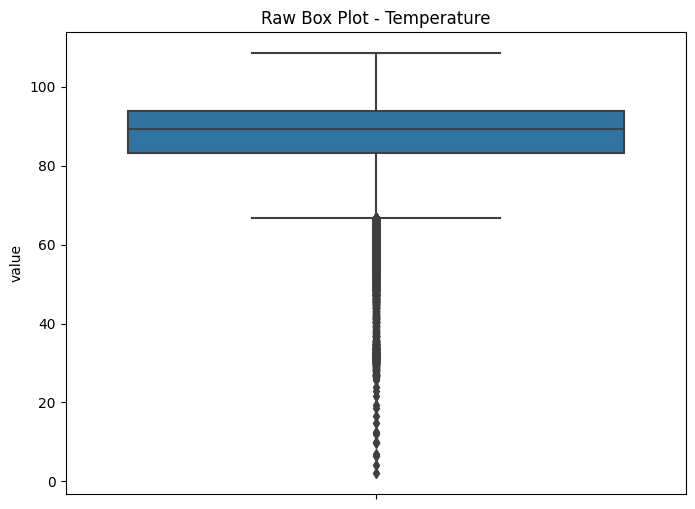

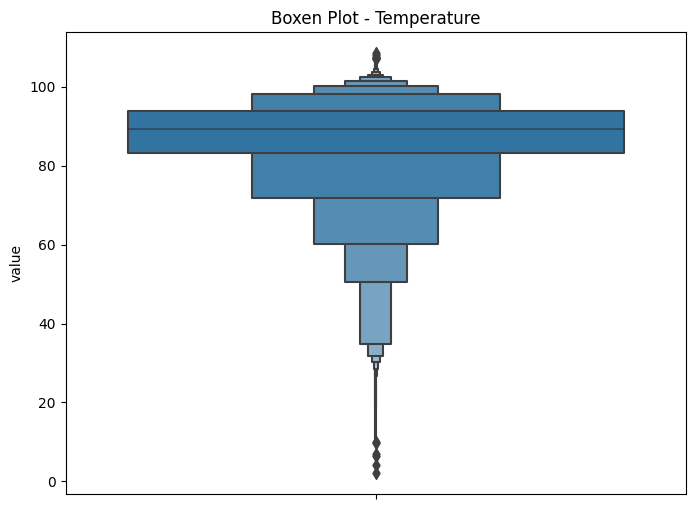

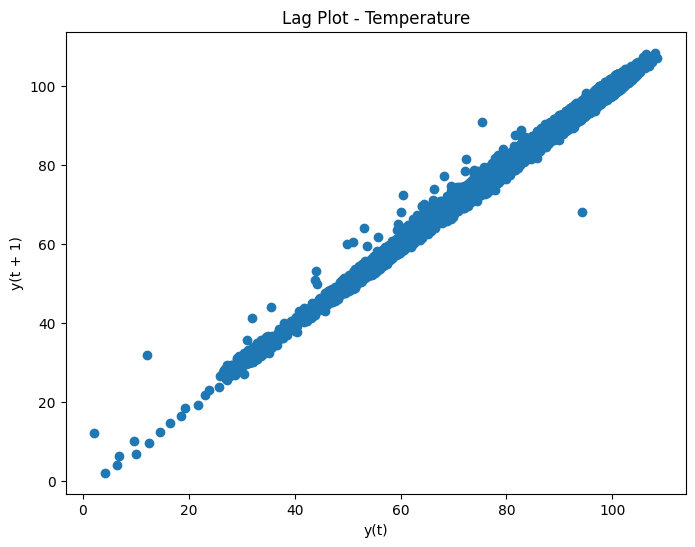

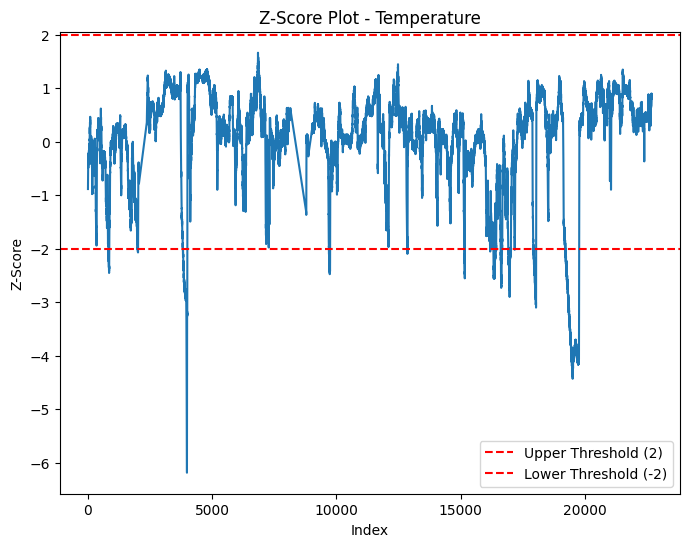

Outliers using IQR method:
              timestamp      value
320    03-12-2013 23:55  65.906496
321    04-12-2013 00:00  66.204651
322    04-12-2013 00:05  66.094398
323    04-12-2013 00:10  64.925151
324    04-12-2013 00:15  65.910542
...                 ...        ...
19770  09-02-2014 11:45  30.975528
19771  09-02-2014 11:50  35.624129
19772  09-02-2014 11:55  43.971303
19773  09-02-2014 12:00  53.135749
19774  09-02-2014 12:05  64.134769

[2061 rows x 2 columns]


In [64]:
import seaborn as sns
from scipy.stats import zscore

# Generate a raw box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='value')
plt.title('Raw Box Plot - Temperature')
plt.show()

# Generate a boxen plot
plt.figure(figsize=(8, 6))
sns.boxenplot(data=df, y='value')
plt.title('Boxen Plot - Temperature')
plt.show()

# Generate a lag plot
plt.figure(figsize=(8, 6))
pd.plotting.lag_plot(df['value'])
plt.title('Lag Plot - Temperature')
plt.show()


# Define the iqr_outliers function
def iqr_outliers(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

# Find outliers using IQR method
outliers_iqr = iqr_outliers(df, 'value')

# Compute z-score
df['z_score'] = zscore(df['value'])

# Plot z-score
plt.figure(figsize=(8, 6))
plt.plot(df['z_score'])
plt.axhline(y=2, color='r', linestyle='--', label='Upper Threshold (2)')
plt.axhline(y=-2, color='r', linestyle='--', label='Lower Threshold (-2)')
plt.xlabel('Index')
plt.ylabel('Z-Score')
plt.title('Z-Score Plot - Temperature')
plt.legend()
plt.show()

# Print the outliers
print("Outliers using IQR method:")
print(outliers_iqr)